<a href="https://colab.research.google.com/github/ctshiz/WORKSPACE_STOCK_MARKET_PREDICTION/blob/main/Correlation_of_economic_factors_in_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#Step 1: Determine the installed version of module pandas_datareader
!pip show pandas_datareader
#Step 2: if the version is lower than 0.10.0 then upgrade the version.
!pip install --upgrade pandas_datareader
#Step 3: Don't forget to restart the runtime to load the new libraries.
#Press Runtime->Restart runtime

Name: pandas-datareader
Version: 0.10.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: /usr/local/lib/python3.8/dist-packages
Requires: lxml, requests, pandas
Required-by: 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
#Step 4: Now try running the step 1 again to determine if the newest version is installed.
!pip show pandas_datareader

Name: pandas-datareader
Version: 0.10.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: /usr/local/lib/python3.8/dist-packages
Requires: lxml, requests, pandas
Required-by: 


In [43]:
#step 5: importing packages
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
from math import floor
import seaborn
from datetime import datetime
import pandas_datareader.data as web

In [44]:
#Step-2: MACD Calculation
def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df1 = pd.concat(frames, join = 'inner', axis = 1)
    return df1
    
#step 7: RSI calculation
def get_rsi(close, lookback):
  ret = close.diff()
  up = []
  down = []
  for i in range(len(ret)):
    if ret[i] < 0:
      up.append(0)
      down.append(ret[i])
    else:
      up.append(ret[i])
      down.append(0)
  up_series = pd.Series(up)
  down_series = pd.Series(down).abs()
  up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
  down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
  rs = up_ewm / down_ewm
  rsi = 100 - (100 /(1 + rs))
  rsi_df = pd.DataFrame(rsi).rename(columns={0:'RSI'}).set_index(close.index)
  rsi_df = rsi_df.dropna()
  return rsi_df[3:]

In [45]:
#Step-6: Extracting Data from Yahoo Finance 
# Now let's define a range, that means, from when until when we want the data:
start_date= datetime(2020, 1, 1) # the format is YYYY-MM-DD
end_date= datetime(2022, 12, 2)
# We will use data from Google and Microsoft in our analysis
#banco_brasil= web.DataReader("BBAS3.SA", 'yahoo', start_date, end_date) #erro aqui 
#banco_brasil = banco_brasil.reset_index()

In [46]:
banco_brasil  = pd.read_csv("stock_market.csv")
banco_brasil

,Unnamed: 0,Date,High,Low,Open,Close,Volume,Adj Close,Symbol
0,0,2017-08-24,32.209999,31.809999,32.060001,32.119999,6438500.0,24.332878,BBAS3.SA
1,1,2017-08-25,32.410000,31.920000,32.180000,32.000000,4164900.0,24.241976,BBAS3.SA
2,2,2017-08-28,32.189999,31.510000,32.189999,31.700001,4372800.0,24.014709,BBAS3.SA
3,3,2017-08-29,31.549999,31.170000,31.500000,31.490000,7251100.0,23.855621,BBAS3.SA
4,4,2017-08-30,31.680000,31.000000,31.510000,31.170000,5425500.0,23.613199,BBAS3.SA
...,...,...,...,...,...,...,...,...,...
1239,1239,2022-08-18,43.090000,41.650002,42.810001,41.820000,15831500.0,41.614384,BBAS3.SA
1240,1240,2022-08-19,41.750000,40.360001,41.279999,41.049999,27331500.0,40.848167,BBAS3.SA
1241,1241,2022-08-22,41.630001,40.349998,41.029999,41.470001,26637500.0,41.266106,BBAS3.SA
1242,1242,2022-08-23,42.000000,40.900002,40.910000,41.520000,13947800.0,41.520000,BBAS3.SA


In [47]:
banco_brasil['rsi_14'] = get_rsi(banco_brasil['Close'], 14)
banco_brasil = banco_brasil.dropna()
banco_brasil

,Unnamed: 0,Date,High,Low,Open,Close,Volume,Adj Close,Symbol,rsi_14
4,4,2017-08-30,31.680000,31.000000,31.510000,31.170000,5425500.0,23.613199,BBAS3.SA,0.000000
5,5,2017-08-31,31.309999,30.400000,31.129999,30.700001,9098800.0,23.257149,BBAS3.SA,0.000000
6,6,2017-09-01,31.969999,31.000000,31.000000,31.889999,13659100.0,24.158640,BBAS3.SA,50.076421
7,7,2017-09-04,32.080002,31.639999,31.879999,31.840000,4131400.0,24.120768,BBAS3.SA,48.966895
8,8,2017-09-05,33.049999,32.000000,33.000000,32.000000,11118900.0,24.241976,BBAS3.SA,52.587165
...,...,...,...,...,...,...,...,...,...,...
1239,1239,2022-08-18,43.090000,41.650002,42.810001,41.820000,15831500.0,41.614384,BBAS3.SA,69.198767
1240,1240,2022-08-19,41.750000,40.360001,41.279999,41.049999,27331500.0,40.848167,BBAS3.SA,63.652373
1241,1241,2022-08-22,41.630001,40.349998,41.029999,41.470001,26637500.0,41.266106,BBAS3.SA,65.286751
1242,1242,2022-08-23,42.000000,40.900002,40.910000,41.520000,13947800.0,41.520000,BBAS3.SA,65.485714


In [48]:
##Step-2: MACD Calculation
bbas3_macd = get_macd(banco_brasil['Close'], 26, 12, 9)
bbas3_macd

,macd,signal,hist
4,0.000000,0.000000,0.000000
5,-0.037493,-0.007499,-0.029994
6,0.028488,-0.000301,0.028790
7,0.075870,0.014933,0.060937
8,0.124891,0.036925,0.087966
...,...,...,...
1239,2.230796,1.813587,0.417209
1240,2.088241,1.868518,0.219723
1241,1.986260,1.892066,0.094193
1242,1.887713,1.891196,-0.003483


In [67]:
df3 = pd.merge(banco_brasil,bbas3_macd, left_index=True, right_index=True)
df3

,Unnamed: 0,Date,High,Low,Open,Close,Volume,Adj Close,Symbol,rsi_14,macd,signal,hist
4,4,2017-08-30,31.680000,31.000000,31.510000,31.170000,5425500.0,23.613199,BBAS3.SA,0.000000,0.000000,0.000000,0.000000
5,5,2017-08-31,31.309999,30.400000,31.129999,30.700001,9098800.0,23.257149,BBAS3.SA,0.000000,-0.037493,-0.007499,-0.029994
6,6,2017-09-01,31.969999,31.000000,31.000000,31.889999,13659100.0,24.158640,BBAS3.SA,50.076421,0.028488,-0.000301,0.028790
7,7,2017-09-04,32.080002,31.639999,31.879999,31.840000,4131400.0,24.120768,BBAS3.SA,48.966895,0.075870,0.014933,0.060937
8,8,2017-09-05,33.049999,32.000000,33.000000,32.000000,11118900.0,24.241976,BBAS3.SA,52.587165,0.124891,0.036925,0.087966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,1239,2022-08-18,43.090000,41.650002,42.810001,41.820000,15831500.0,41.614384,BBAS3.SA,69.198767,2.230796,1.813587,0.417209
1240,1240,2022-08-19,41.750000,40.360001,41.279999,41.049999,27331500.0,40.848167,BBAS3.SA,63.652373,2.088241,1.868518,0.219723
1241,1241,2022-08-22,41.630001,40.349998,41.029999,41.470001,26637500.0,41.266106,BBAS3.SA,65.286751,1.986260,1.892066,0.094193
1242,1242,2022-08-23,42.000000,40.900002,40.910000,41.520000,13947800.0,41.520000,BBAS3.SA,65.485714,1.887713,1.891196,-0.003483


In [68]:
df3['Date'] = pd.to_datetime(df3['Date'])
df3['Year'] = df3.Date.dt.year

In [69]:
df3['Month'] = df3.Date.dt.month

In [71]:
ipca = pd.read_csv("/content/IPCA.csv", sep=";")
ipca['Date'] = pd.to_datetime(ipca.Data)

In [72]:
ipca['Year'] = ipca.Date.dt.year
ipca['Month'] = ipca.Date.dt.month

In [73]:
unrate = pd.read_csv("/content/taxa de desemprego.csv", sep=";")
unrate['Date'] = pd.to_datetime(unrate.Lançamento)
unrate['Year'] = unrate.Date.dt.year
unrate['Month'] = unrate.Date.dt.month
unrate = unrate.rename(columns={"Atual":"Taxa de desemprego"})

In [74]:
#merge all
ipca = ipca.drop(columns=['Date'])
unrate = unrate.drop(columns=['Date'])
df4 = df3.merge(ipca, on =['Year', 'Month'], how='inner')
df5 = df4.merge(unrate,on =['Year', 'Month'], how='inner')

In [75]:
df5 = df5.drop(columns=['Lançamento', 'Data', 'Hora', 'Projeção', 'Anterior', 'Unnamed: 5'])

In [76]:
df5 = df5.drop(columns=['High', 'Low', 'Volume', 'Adj Close'])

In [77]:
df5 = df5.drop(columns=['Year', 'Month', 'signal', 'hist'])

In [78]:
df5 = df5.drop(columns=['Unnamed: 0'])

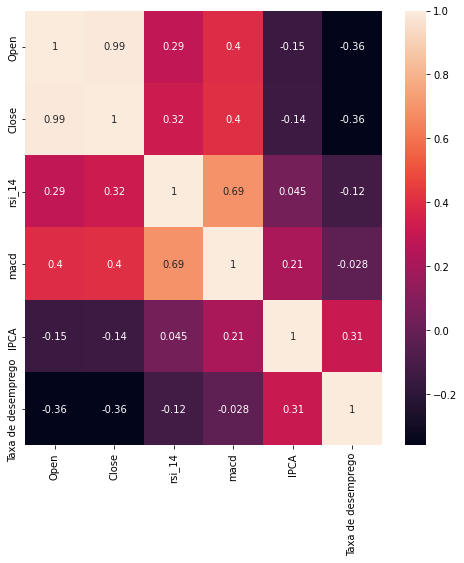

In [79]:
plt.figure(figsize=(8, 8))
seaborn.heatmap(df5.drop(columns=['Date']).corr(),annot=True)
